In [29]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
% matplotlib inline

def draw_comparison_mats(mats, figsize=(12, 4), cmaps=None, interpolations=None):
    fig = plt.figure(figsize=figsize)

    for i, mat in enumerate(mats, start=1):
        a = fig.add_subplot(1, len(mats), i)
        a.set_title('image' + str(i))
        # http://stackoverflow.com/a/14728122/2692914 (interpolation method)
        if cmaps is None:
            plt.imshow(mats[i - 1])
        else:
            if interpolations is None:
                plt.imshow(mats[i - 1], cmap=cmaps[i - 1])
            else:
                plt.imshow(mats[i - 1], cmap=cmaps[i - 1], interpolation=interpolations[i - 1])

    plt.show()

img (2).jpg


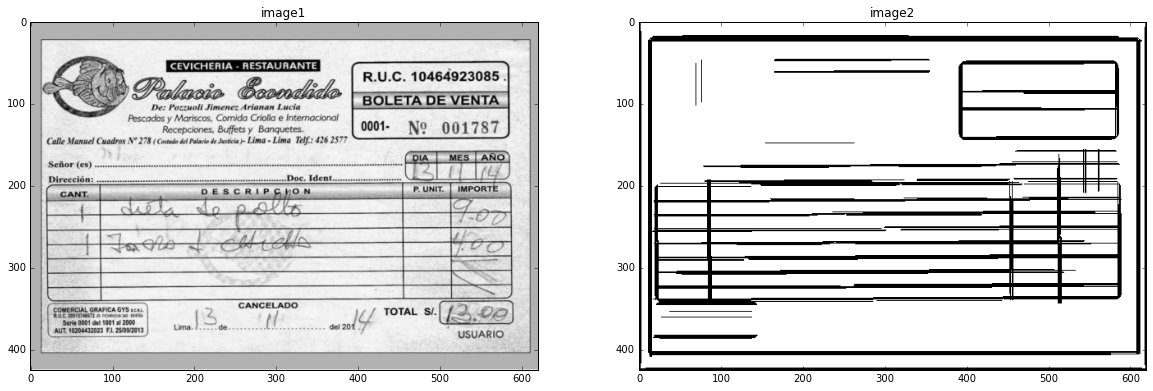

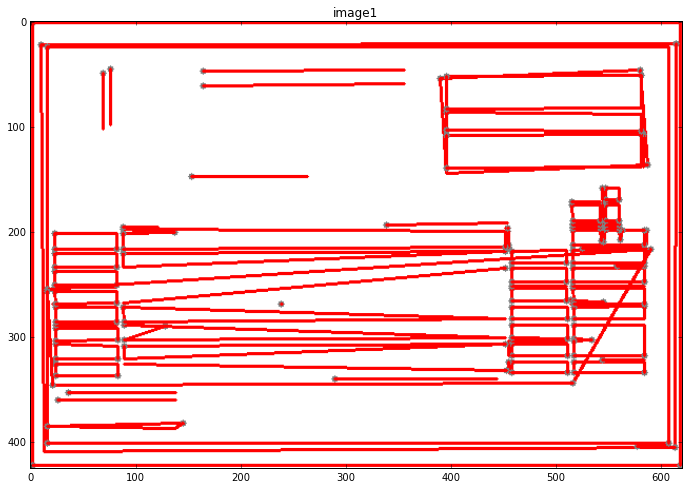

In [28]:
def create_graph(newimg, vertex, color):
    for g in range(0, len(vertex) - 1):
        for y in range(0, len(vertex[0][0]) - 1):
            # cv2.circle(newimg, (vertex[g][0][y], vertex[g][0][y + 1]), 3, (255, 255, 255), -1)
            cv2.circle(newimg, (vertex[g][0][y], vertex[g][0][y + 1]), 3, (128, 128, 128), -1)
            cv2.line(newimg, (vertex[g][0][y], vertex[g][0][y + 1]), (vertex[g + 1][0][y], vertex[g + 1][0][y + 1]),
                     color, 2)
    cv2.line(newimg, (vertex[len(vertex) - 1][0][0], vertex[len(vertex) - 1][0][1]), (vertex[0][0][0], vertex[0][0][1]),
             color, 2)

images = [
    # "img (1).jpg",
    "img (2).jpg",
    # "img (3).jpg",
    # "img (4).jpg",
    # "img (5).jpg",
    # "img (6).jpg"
]
for image in images:
    print(image)
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.bilateralFilter(img, 11, 17, 17)
    edges = cv2.Canny(blur, 0, 150, apertureSize=3)
    # edges = cv2.threshold(edges, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
    edges = cv2.dilate(edges, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # vertical
    # final = img.copy()
    final = np.full(img.shape, 255, dtype=np.uint8)
    final = cv2.cvtColor(final, cv2.COLOR_GRAY2RGB)
    lines = cv2.HoughLinesP(edges, 1, np.pi, threshold=50, minLineLength=50)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(final, (x1, y1), (x2, y2), (0, 0, 0), 1)

    # horizontal
    lines = cv2.HoughLinesP(edges, 1, np.pi / 2, threshold=100, minLineLength=100)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(final, (x1, y1), (x2, y2), (0, 0, 0), 1)

    imgcnts = np.full(final.shape, 255, dtype=np.uint8)
    final = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)
    # cnts, hcy = cv2.findContours(final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts, hcy, tmp = cv2.findContours(final.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # print(cnts)
    # print(hcy)
    # print(tmp)

    for i, cnt in enumerate(hcy):
        approx = cv2.approxPolyDP(cnt, 0.015 * cv2.arcLength(cnt, True), True)
        clr = (255, 0, 0)
        create_graph(imgcnts, approx, clr)  #function for drawing the found contours in the new img
    # # cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
    # # screenCnt = None
    # 
    # # draw_comparison_mats([img, edges, final], (20, 8), ['gray', 'gray', 'gray'])
    draw_comparison_mats([img, final], (20, 8), ['gray', 'gray'])
    draw_comparison_mats([imgcnts], (20, 8), ['gray'])